<a href="https://colab.research.google.com/github/arcrowell/arcrowell.github.io/blob/main/Time_Series_Lab_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import pandas as pd

path = r'https://raw.githubusercontent.com/ncrowder/python/refs/heads/main/timeseries_full.csv'
df_og = pd.read_csv(path, parse_dates= ['date'])

df_indexed = df_og.set_index("date")
df_indexed

,customers,coffee_sold,avg_sale,total_sales
date,,,,
2021-01-01,104,78,4.80,499.20
2021-01-02,118,97,4.78,564.04
2021-01-03,116,93,4.81,557.96
2021-01-04,102,71,4.77,486.54
2021-01-05,101,71,4.82,486.82
...,...,...,...,...
2021-12-27,109,76,4.80,523.20
2021-12-28,111,79,4.80,532.80
2021-12-29,114,84,4.81,548.34


#Exercise 1

Remove the date(s) when the business was closed ($0 sales) from the dataset.

In [84]:
df_open = df_indexed[df_indexed['total_sales'] != 0]
df_open

,customers,coffee_sold,avg_sale,total_sales
date,,,,
2021-01-01,104,78,4.80,499.20
2021-01-02,118,97,4.78,564.04
2021-01-03,116,93,4.81,557.96
2021-01-04,102,71,4.77,486.54
2021-01-05,101,71,4.82,486.82
...,...,...,...,...
2021-12-26,123,99,4.79,589.17
2021-12-27,109,76,4.80,523.20
2021-12-28,111,79,4.80,532.80


#Exercise 2

Rerun the EWA forecast using an value of .15. Show the plot of the original total_sales
along with the forecast, and then calculate the error/variance in total_sales and forecasted
value for August 13

**Answer:**

The error between Total Sales and EWMA_0.15 on August 13th is -34.90330505137035

In [85]:
df_open["EWMA_0.15"] = df_open["total_sales"].ewm(alpha=0.15).mean()
df_open.head()

/tmp/ipython-input-2238338346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_open["EWMA_0.15"] = df_open["total_sales"].ewm(alpha=0.15).mean()


,customers,coffee_sold,avg_sale,total_sales,EWMA_0.15
date,,,,,
2021-01-01,104,78,4.80,499.20,499.200000
2021-01-02,118,97,4.78,564.04,534.248649
2021-01-03,116,93,4.81,557.96,543.465889
2021-01-04,102,71,4.77,486.54,525.601883
2021-01-05,101,71,4.82,486.82,515.144687


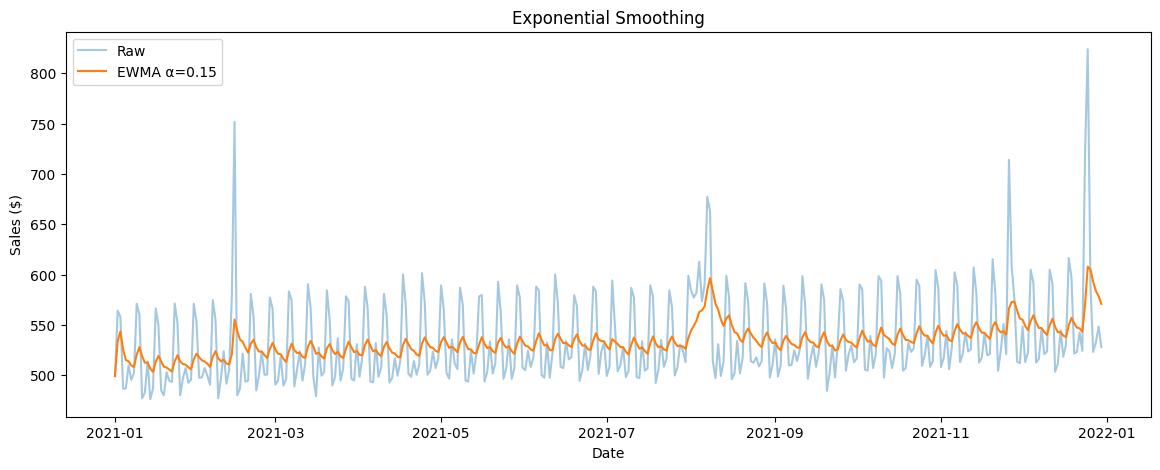

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(df_open["total_sales"], alpha=0.4, label="Raw")
plt.plot(df_open["EWMA_0.15"], label="EWMA α=0.15")
plt.title("Exponential Smoothing")
plt.xlabel("Date")
plt.ylabel("Sales ($)")
plt.legend()
plt.show()

In [87]:
error = df_open.loc['2021-08-13','total_sales'] - df_open.loc['2021-08-13',"EWMA_0.15"]
print('The error between Total Sales and EWMA_0.15 on August 13th is', error)

The error between Total Sales and EWMA_0.15 on August 13th is -34.90330505137035


#Exercise 3

Create a 7 day moving average forecast that uses a median as opposed to a mean. Call it
“pred_roll_med” and call the original one that uses the mean “pred_roll_mean.” Plot these
along with the actual total_sales values, and then calculate the differences between actuals
and predictions (both types) for September 17.

**Answer:**

The differences between actuals and predictions for September 17th:

Median: 0.0

Mean: -12.015714285714239

In [88]:
# Create rolling averages for smoothing
df_open["pred_roll_med"] = df_open["total_sales"].rolling(window = 7, min_periods = 1).median() #include window = AND min_periods = if you want to avoid the NaN values...
df_open["pred_roll_mean"] = df_open["total_sales"].rolling(window = 7, min_periods = 1).mean() #include window = AND min_periods = if you want to avoid the NaN values...
df_open.head()

df_open.loc['2021-09-17']

/tmp/ipython-input-2646022266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_open["pred_roll_med"] = df_open["total_sales"].rolling(window = 7, min_periods = 1).median() #include window = AND min_periods = if you want to avoid the NaN values...
/tmp/ipython-input-2646022266.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_open["pred_roll_mean"] = df_open["total_sales"].rolling(window = 7, min_periods = 1).mean() #include window = AND min_periods = if you want to avoid the NaN values...


,2021-09-17
customers,110.000000
coffee_sold,84.000000
avg_sale,4.750000
total_sales,522.500000
EWMA_0.15,527.831182
pred_roll_med,522.500000
pred_roll_mean,534.515714


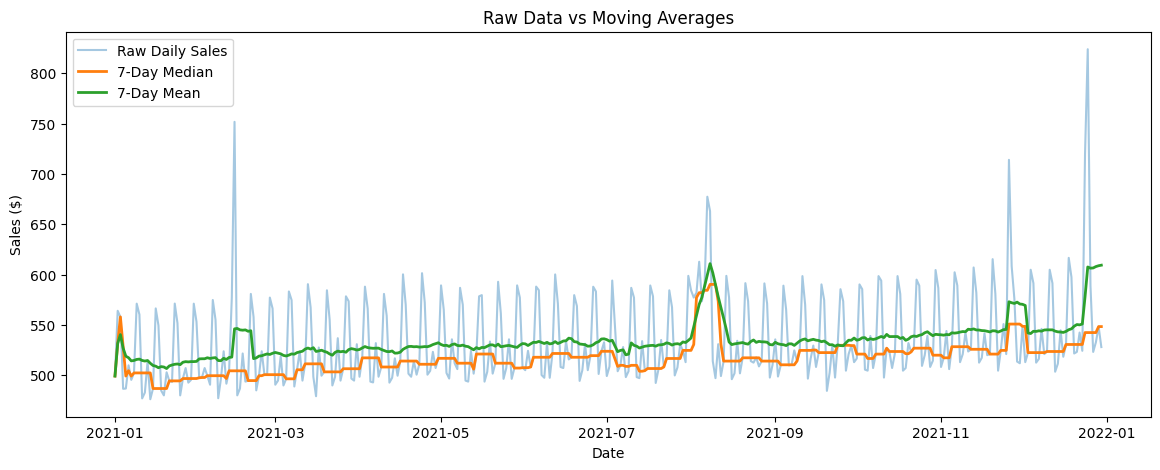

In [89]:
plt.figure(figsize=(14,5))
plt.plot(df_open["total_sales"], label="Raw Daily Sales", alpha=0.4)
plt.plot(df_open["pred_roll_med"], label="7-Day Median", linewidth=2)
plt.plot(df_open["pred_roll_mean"], label="7-Day Mean", linewidth=2)
plt.title("Raw Data vs Moving Averages")
plt.xlabel("Date")
plt.ylabel("Sales ($)")
plt.legend()
plt.show()

In [90]:
total_sales_sept_seventeenth = df_open.loc['2021-09-17', 'total_sales']
prmed_sept_seventeenth = df_open.loc['2021-09-17', 'pred_roll_med']
prmean_sept_seventeenth = df_open.loc['2021-09-17', 'pred_roll_mean']

error_med = total_sales_sept_seventeenth - prmed_sept_seventeenth
error_mean = total_sales_sept_seventeenth - prmean_sept_seventeenth

print('The difference using median for 09/17 is', error_med)
print('The difference using mean for 09/17 is', error_mean)

The difference using median for 09/17 is 0.0
The difference using mean for 09/17 is -12.015714285714239


#Exercise 4

Use one of the other columns (besides average_sales) in the dataset to calculate a two-week
rolling average forecast and an EWA forecast using an alpha value of 10%. Show a plot of all
three, appropriately labeled.


In [91]:
df_open["cust_roll_mean"] = df_open["customers"].rolling(window = 14, min_periods = 1).mean() #include window = AND min_periods = if you want to avoid the NaN values...
df_open["cust_EWMA_0.10"] = df_open["customers"].ewm(alpha=0.10).mean()
df_open.head()

/tmp/ipython-input-1049778439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_open["cust_roll_mean"] = df_open["customers"].rolling(window = 14, min_periods = 1).mean() #include window = AND min_periods = if you want to avoid the NaN values...
/tmp/ipython-input-1049778439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_open["cust_EWMA_0.10"] = df_open["customers"].ewm(alpha=0.10).mean()


,customers,coffee_sold,avg_sale,total_sales,EWMA_0.15,pred_roll_med,pred_roll_mean,cust_roll_mean,cust_EWMA_0.10
date,,,,,,,,,
2021-01-01,104,78,4.80,499.20,499.200000,499.20,499.200,104.000000,104.000000
2021-01-02,118,97,4.78,564.04,534.248649,531.62,531.620,111.000000,111.368421
2021-01-03,116,93,4.81,557.96,543.465889,557.96,540.400,112.666667,113.077491
2021-01-04,102,71,4.77,486.54,525.601883,528.58,526.935,110.000000,109.856354
2021-01-05,101,71,4.82,486.82,515.144687,499.20,518.912,108.200000,107.693683


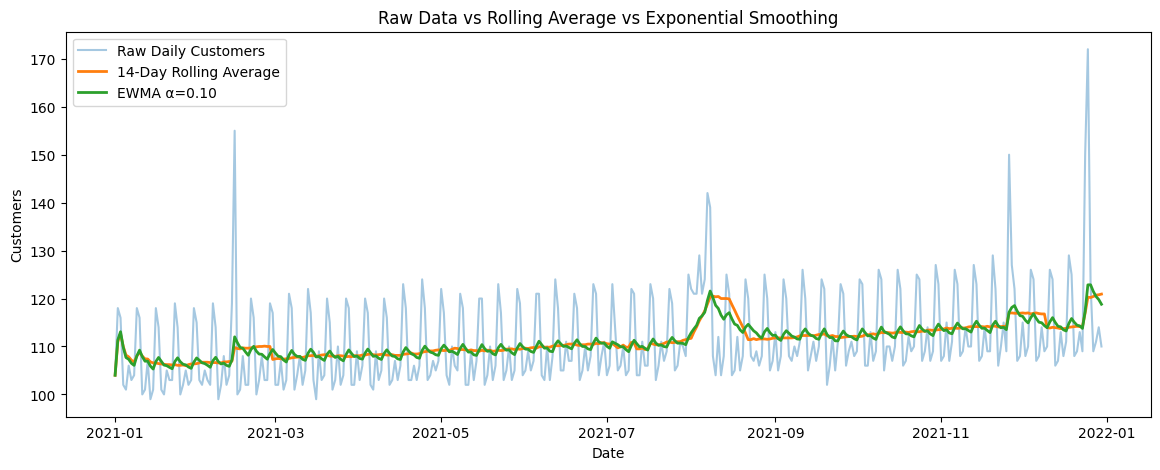

In [92]:
plt.figure(figsize=(14,5))
plt.plot(df_open["customers"], label="Raw Daily Customers", alpha=0.4)
plt.plot(df_open["cust_roll_mean"], label="14-Day Rolling Average", linewidth=2)
plt.plot(df_open["cust_EWMA_0.10"], label="EWMA α=0.10", linewidth=2)
plt.title("Raw Data vs Rolling Average vs Exponential Smoothing")
plt.xlabel("Date")
plt.ylabel("Customers")
plt.legend()
plt.show()

#Exercise 5

How much better or worse is the MAPE for an EWA using an of .25 vs .10?

**Answer:**

Using alpha 0.10, MAPE is: 1.147415919309766

Using alpha 0.25, MAPE is: 0.986747633471189

MAPE 0.25 is better than MAPE 0.10 in this case as it is closer to 0. The difference between alpha 0.25 and alpha 0.10 is 0.160668.



In [93]:
import numpy as np

errors_ten = df_open["customers"] - df_open["cust_EWMA_0.10"]
MAPE_ten = (errors_ten.abs() / df_open["total_sales"]).replace([np.inf,np.nan],0).mean() * 100

df_open["cust_EWMA_0.25"] = df_open["customers"].ewm(alpha=0.25).mean()
errors_twenty_five = df_open["customers"] - df_open["cust_EWMA_0.25"]
MAPE_twenty_five = (errors_twenty_five.abs() / df_open["total_sales"]).replace([np.inf,np.nan],0).mean() * 100

print('Using alpha 0.10, MAPE is:', MAPE_ten)
print('Using alpha 0.25, MAPE is:', MAPE_twenty_five)

print('Difference between alpha 0.25 and alpha 0.10 is', abs(MAPE_ten - MAPE_twenty_five))

Using alpha 0.10, MAPE is: 1.147415919309766
Using alpha 0.25, MAPE is: 0.986747633471189
Difference between alpha 0.25 and alpha 0.10 is 0.16066828583857695


/tmp/ipython-input-2873686022.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_open["cust_EWMA_0.25"] = df_open["customers"].ewm(alpha=0.25).mean()


#Exercise 6

Resample with freq = “ME” and use a sum on the ‘total_sales’ column. This will produce a
series you can call dfmonth. Which month had the least sales? Show a line plot or bar plot.

**Answer**
The month that had the least sales was February.

In [94]:
df_month = df_open["total_sales"].resample("ME").sum()
df_month_in_frame = df_month.to_frame()

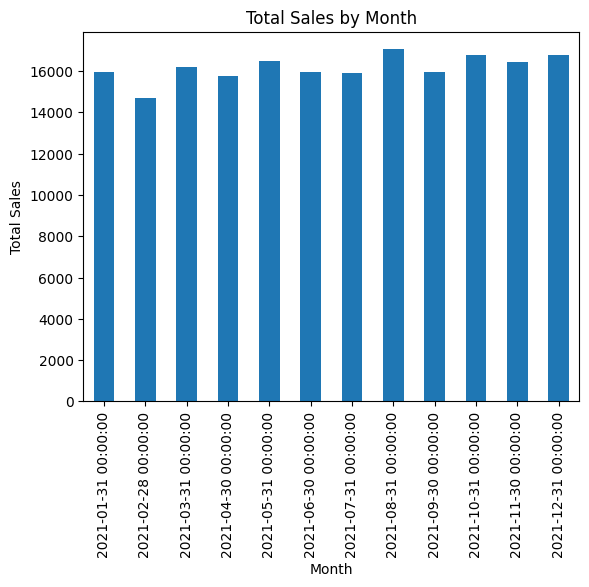

In [95]:
df_month.plot.bar(title='Total Sales by Month', xlabel='Month', y='total_sales', ylabel='Total Sales')
plt.show()

#Exercise 7

Add a “cum_range” column to the series from #6 using two other cumulative functions
(there is no built-in cumrange). *Hint: If you try to create it directly (dfmonth[‘cum_range’] = )
python complains because you can’t add a column to a series. First convert the series to a
dataframe using the .to_frame() method and then try again. Then plot the result.

In [96]:
df_month_in_frame = df_month.to_frame()

df_month_in_frame['cum_range'] = df_month_in_frame['total_sales'].cummax() - df_month_in_frame['total_sales'].cummin()
df_month_in_frame

,total_sales,cum_range
date,,
2021-01-31,15960.57,0.00
2021-02-28,14713.72,1246.85
2021-03-31,16179.02,1465.30
2021-04-30,15777.59,1465.30
2021-05-31,16472.81,1759.09
2021-06-30,15964.00,1759.09
2021-07-31,15902.57,1759.09
2021-08-31,17046.04,2332.32
2021-09-30,15961.92,2332.32


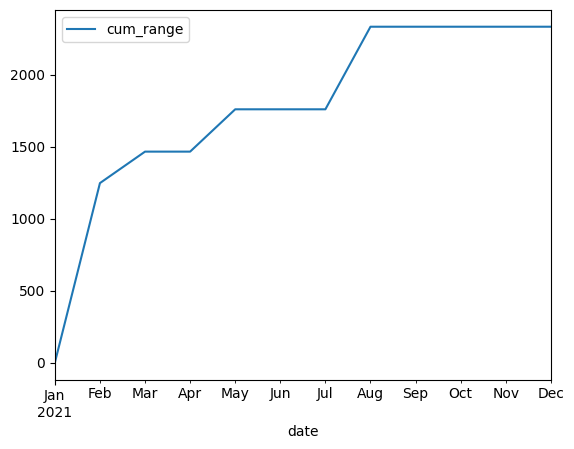

In [97]:
df_month_in_frame.plot.line(y='cum_range', xlabel='date')
plt.show()

#Exercise 8

Combine the original data (before adding all the new columns and predictions) with the data
found here, using an appropriate method of your choosing. Rework #2 using this fuller
dataset.

**Answer:**

The error between Total Sales and EWMA_0.15 on August 13th is -34.90330505137035

In [98]:
def append_new_timeseries(existing_df, new_df, date_col="date"):
    # Parse date column into datetime
    if new_df[date_col].dtype != "datetime64[ns]":
        new_df[date_col] = pd.to_datetime(new_df[date_col], infer_datetime_format=True, errors="coerce")

    # Identify rows with invalid date parsing
    bad_dates = new_df[new_df[date_col].isna()]
    if len(bad_dates) > 0:
        print(f"\nWARNING: {len(bad_dates)} rows had unparseable dates and were dropped:")
        print(bad_dates)
        new_df = new_df.dropna(subset=[date_col])

    # Set datetime index
    new_df = new_df.set_index(date_col)

    # Align columns to existing dataset
    needed_cols = existing_df.columns
    new_cols = new_df.columns

    missing_cols = set(needed_cols) - set(new_cols)
    extra_cols = set(new_cols) - set(needed_cols)

    if missing_cols:
        print(f"\nMissing columns in new data (filled with NaN): {missing_cols}")
        for col in missing_cols:
            new_df[col] = pd.NA

    if extra_cols:
        print(f"\nExtra columns in new data (dropped): {extra_cols}")

    new_df = new_df.reindex(columns=needed_cols)

    # Track timestamps BEFORE appending
    existing_dates = set(existing_df.index)
    new_dates = set(new_df.index)

    overlapping_dates = existing_dates.intersection(new_dates)
    new_only_dates = new_dates - existing_dates

    # Append
    combined = pd.concat([existing_df, new_df])

    # Sort chronologically
    combined = combined.sort_index()

    # Remove duplicate timestamps (keep newest rows)
    duplicate_mask = combined.index.duplicated(keep="last")
    duplicate_dates_removed = combined.index[duplicate_mask]

    if len(duplicate_dates_removed) > 0:
        print(f"\nDuplicate timestamps replaced (kept last version):")
        print(list(duplicate_dates_removed))

    combined = combined[~duplicate_mask]

    # Diagnostics
    print("\n=== Append Summary ===")
    print(f"Rows in existing dataset: {len(existing_df)}")
    print(f"Rows in new dataset: {len(new_df)}")
    print(f"New unique dates added: {len(new_only_dates)}")
    print(f"Dates overwritten (duplicates updated): {len(overlapping_dates)}")

    if len(new_only_dates) > 0:
        print("\nDates added:")
        print(sorted(list(new_only_dates))[:10], "...")  # preview

    if len(overlapping_dates) > 0:
        print("\nDates overwritten:")
        print(sorted(list(overlapping_dates))[:10], "...")  # preview

    print("\nFinal combined row count:", len(combined))
    print("=== Append Complete ===\n")

    return combined

In [99]:
path = r'https://raw.githubusercontent.com/ncrowder/python/refs/heads/main/dec2021_jan2022_adjusted.csv'
df_new_data = pd.read_csv(path, parse_dates= ['date'])
df_new_data

df_combo = append_new_timeseries(df_indexed, df_new_data, date_col="date")


Duplicate timestamps replaced (kept last version):
[Timestamp('2021-12-01 00:00:00'), Timestamp('2021-12-02 00:00:00'), Timestamp('2021-12-03 00:00:00'), Timestamp('2021-12-04 00:00:00'), Timestamp('2021-12-05 00:00:00'), Timestamp('2021-12-06 00:00:00'), Timestamp('2021-12-07 00:00:00'), Timestamp('2021-12-08 00:00:00'), Timestamp('2021-12-09 00:00:00'), Timestamp('2021-12-10 00:00:00'), Timestamp('2021-12-11 00:00:00'), Timestamp('2021-12-12 00:00:00'), Timestamp('2021-12-13 00:00:00'), Timestamp('2021-12-14 00:00:00'), Timestamp('2021-12-15 00:00:00'), Timestamp('2021-12-16 00:00:00'), Timestamp('2021-12-17 00:00:00'), Timestamp('2021-12-18 00:00:00'), Timestamp('2021-12-19 00:00:00'), Timestamp('2021-12-20 00:00:00'), Timestamp('2021-12-21 00:00:00'), Timestamp('2021-12-22 00:00:00'), Timestamp('2021-12-23 00:00:00'), Timestamp('2021-12-24 00:00:00'), Timestamp('2021-12-25 00:00:00'), Timestamp('2021-12-26 00:00:00'), Timestamp('2021-12-27 00:00:00'), Timestamp('2021-12-28 00:00:0

In [100]:
df_combo = df_combo[df_combo['total_sales'] != 0]
df_combo

,customers,coffee_sold,avg_sale,total_sales
date,,,,
2021-01-01,104,78,4.80,499.20
2021-01-02,118,97,4.78,564.04
2021-01-03,116,93,4.81,557.96
2021-01-04,102,71,4.77,486.54
2021-01-05,101,71,4.82,486.82
...,...,...,...,...
2022-01-27,113,80,4.81,543.53
2022-01-28,113,85,4.84,546.92
2022-01-29,134,110,4.86,651.24


In [101]:
df_combo["EWMA_0.15"] = df_combo["total_sales"].ewm(alpha=0.15).mean()
df_combo.head()

,customers,coffee_sold,avg_sale,total_sales,EWMA_0.15
date,,,,,
2021-01-01,104,78,4.80,499.20,499.200000
2021-01-02,118,97,4.78,564.04,534.248649
2021-01-03,116,93,4.81,557.96,543.465889
2021-01-04,102,71,4.77,486.54,525.601883
2021-01-05,101,71,4.82,486.82,515.144687


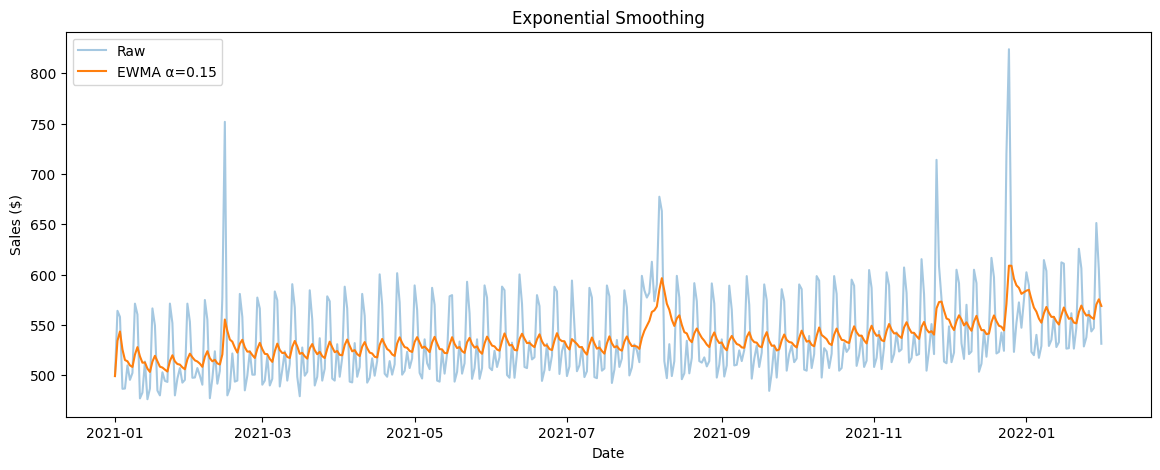

In [102]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(df_combo["total_sales"], alpha=0.4, label="Raw")
plt.plot(df_combo["EWMA_0.15"], label="EWMA α=0.15")
plt.title("Exponential Smoothing")
plt.xlabel("Date")
plt.ylabel("Sales ($)")
plt.legend()
plt.show()

In [103]:
error = df_combo.loc['2021-08-13','total_sales'] - df_combo.loc['2021-08-13',"EWMA_0.15"]
print('The error between Total Sales and EWMA_0.15 on August 13th is', error)

The error between Total Sales and EWMA_0.15 on August 13th is -34.90330505137035
